In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as stats
import seaborn as sns
from yahooquery import Ticker
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datapackage
from datetime import date,datetime,timedelta

pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/554235697.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [24]:
def compute_month_return(stock): 
    month_return=stock_data[stock].Close[-1] / stock_data[stock].Close[0]
    return month_return
def compute_std_deviation(stock):
    stock_data[stock]['log_return'] = np.log(stock_data[stock].Close.div(stock_data[stock].Close.shift(1)))
    std = stock_data[stock]['log_return'].std()
    return std

In [25]:
data_url = 'https://datahub.io/core/s-and-p-500-companies/datapackage.json'
package = datapackage.Package(data_url)
resources = package.resources
for resource in resources:
    if resource.tabular:
        stock_to_analyze = pd.read_csv(resource.descriptor['path'])

stock_to_analyze

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


In [26]:
end = date.today()- timedelta(days=1)
start=end - timedelta(days=31)
stock_data={}
stock_to_analyze['is_null']=False
for index, row in stock_to_analyze.iterrows():
    stock=row.Symbol
    stock_data[stock]= yf.download(stock,start,end)
    if len(stock_data[stock])==0:
        stock_to_analyze.loc[index,'is_null'] = True
        
stock_to_analyze_filtred=stock_to_analyze[stock_to_analyze['is_null']==False]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABMD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CTXS: No tim

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DRE: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FBHS: No data found, symbol may be delisted
[*********************100%***********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NLOK: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLNX: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/629362296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze['is_null'][index] = True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/2182226871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/2182226871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


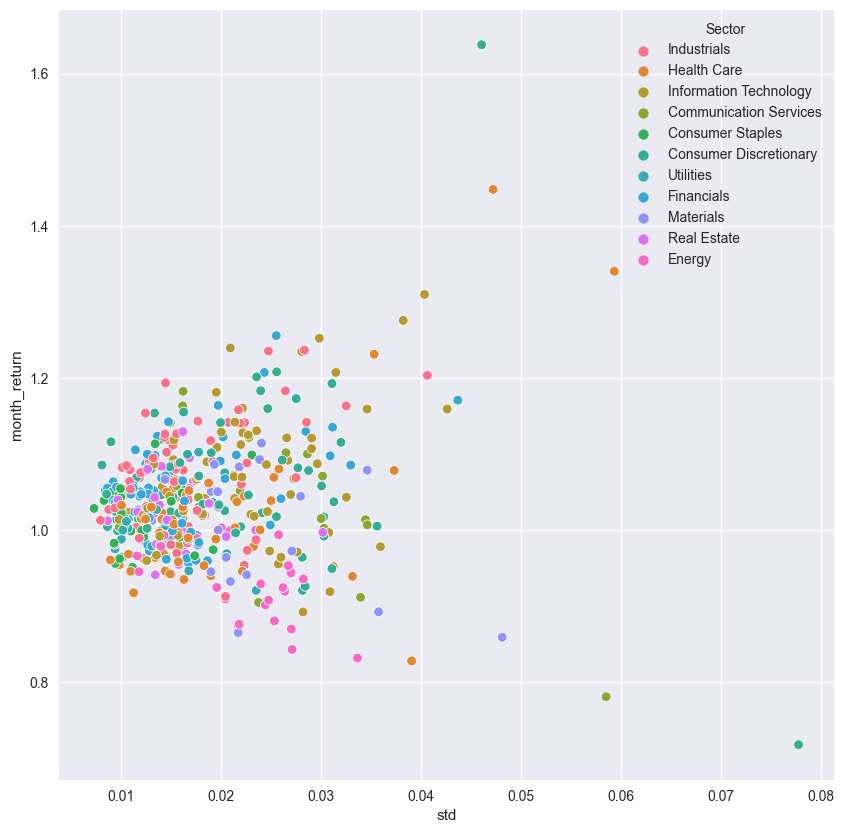

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='std', y='month_return', hue='Sector', data=stock_to_analyze_filtred) 
plt.show()

In [29]:
Sectors=stock_to_analyze_filtred.groupby(['Sector'])['month_return', 'std'].mean()
Sectors.sort_values(by=['month_return'], ascending=False)

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/2578078255.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sectors=stock_to_analyze_filtred.groupby(['Sector'])['month_return', 'std'].mean()


,month_return,std
Sector,,
Communication Services,1.0331,0.0241
Consumer Discretionary,1.0611,0.0213
Consumer Staples,1.0202,0.0124
Energy,0.9259,0.0232
Financials,1.0562,0.0164
Health Care,1.0127,0.0190
Industrials,1.0690,0.0168
Information Technology,1.0707,0.0217
Materials,1.0056,0.0215


In [30]:
stock_to_analyze_filtred[stock_to_analyze_filtred['Sector']=='Financials'].sort_values(by=['month_return'], ascending=False)

,Symbol,Name,Sector,is_null,month_return,std
109,CINF,Cincinnati Financial,Financials,False,1.2559,0.0255
31,AXP,American Express,Financials,False,1.2074,0.0243
423,SIVB,SVB Financial,Financials,False,1.1710,0.0437
269,KEY,KeyCorp,Financials,False,1.1641,0.0197
420,STT,State Street Corporation,Financials,False,1.1426,0.0147
...,...,...,...,...,...,...
322,MCO,Moody's Corporation,Financials,False,0.9632,0.0166
478,WRB,W. R. Berkley Corporation,Financials,False,0.9619,0.0145
106,CB,Chubb,Financials,False,0.9606,0.0175
326,NDAQ,Nasdaq,Financials,False,0.9600,0.0186


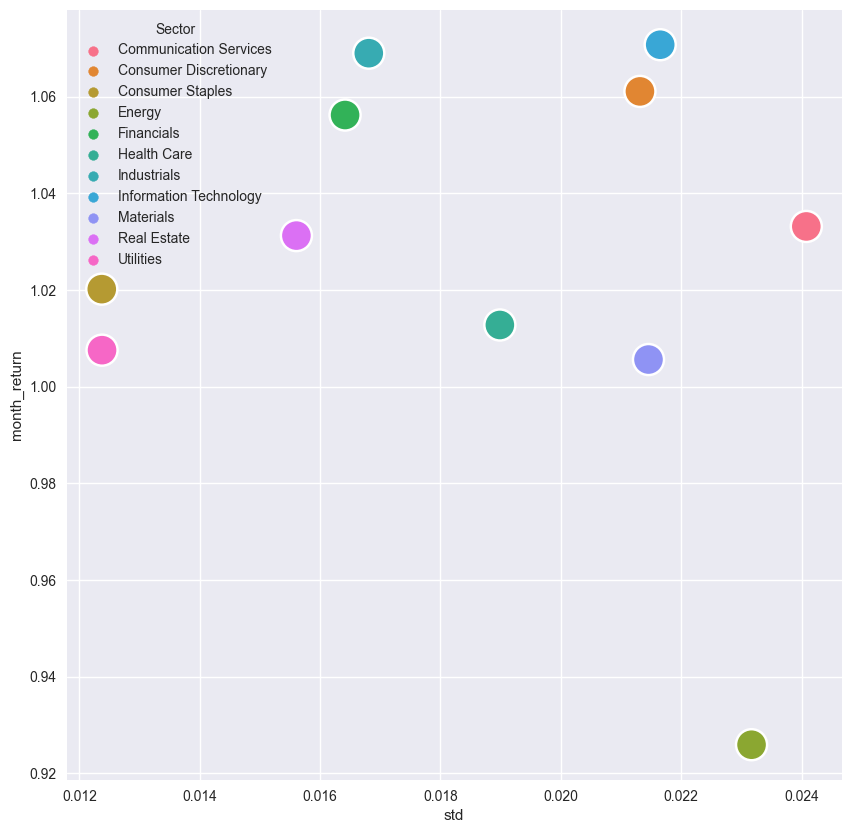

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='std', y='month_return', hue='Sector', data=Sectors, s=500) 
plt.show()

In [32]:
stock_to_analyze_filtred=stock_to_analyze_filtred.sort_values(by=['month_return'], ascending=False)
stock_to_analyze_filtred.groupby('Sector').head(2)

,Symbol,Name,Sector,is_null,month_return,std
436,TSLA,Tesla,Consumer Discretionary,False,1.6380,0.0461
90,CTLT,Catalent,Health Care,False,1.4480,0.0472
19,ALGN,Align Technology,Health Care,False,1.3403,0.0593
320,MPWR,Monolithic Power Systems,Information Technology,False,1.3099,0.0403
344,NVDA,Nvidia,Information Technology,False,1.2758,0.0382
109,CINF,Cincinnati Financial,Financials,False,1.2559,0.0255
479,GWW,W. W. Grainger,Industrials,False,1.2366,0.0283
463,URI,United Rentals,Industrials,False,1.2355,0.0247
215,GM,General Motors,Consumer Discretionary,False,1.2082,0.0255
31,AXP,American Express,Financials,False,1.2074,0.0243


In [ ]:
for x in range(1,13):
    start = datetime(2022,x,1)
    end = datetime(2022,x+1, 1)- timedelta(days=1)
    if x == 12:
        end = datetime(2022,12, 31)- timedelta(days=1)
    start=end - timedelta(days=30)
    stock_data={}
    stock_to_analyze['is_null']=False
    for index, row in stock_to_analyze.iterrows():
        stock=row.Symbol
        stock_data[stock]= yf.download(stock,start,end, progress=False)
        if len(stock_data[stock])==0:
            stock_to_analyze.loc[index,'is_null'] = True
            
    stock_to_analyze_filtred=stock_to_analyze[stock_to_analyze['is_null']==False]
    stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
    stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)

    Sectors=stock_to_analyze_filtred.groupby(['Sector'])['month_return', 'std'].mean()
    Sectors

    stock_to_analyze_filtred=stock_to_analyze_filtred.sort_values(by=['month_return'], ascending=False)
    string1="Sector"+str(2022)+str(x)+".csv"
    string2="Best_Stock"+str(2022)+str(x)+".csv"
    Sectors.sort_values(by=['month_return'], ascending=False).to_csv(string1)
    stock_to_analyze_filtred.groupby('Sector').head(2).to_csv(string2)




1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/2374586277.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_85637/2374586277.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)
/v


1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted
